In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the csv dataset and save it as a datafram. using head() print the first 5 rows values
df=pd.read_csv('credit.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [3]:
#Drop the unwanted columns in the dataset
df.drop(columns=['ID','Customer_ID','Name','SSN','Month'],inplace=True)

In [4]:
#To reduce reduntancy these features can be dropped while creating the model
#Monthly_Inhand_Salary: Despite its high correlation with Amount_invested_monthly, it shows only a weak correlation with Credit_Score. 
#Credit_Mix: It has a relatively weak correlation with Credit_Score and is strongly correlated with Num_Credit_Inquiries (0.66).
df.drop(columns=['Monthly_Inhand_Salary','Credit_Mix'],inplace=True)

In [5]:
#Preprocessing Type_of_Loan column 
# Exclude "No Data" and "Not Specified" from consideration
filtered_df = df[~df['Type_of_Loan'].isin(["No Data", "Not Specified"])]

# Get the top 50 most frequent loan types
top_70_loan_types = filtered_df['Type_of_Loan'].value_counts().head(70).index

# Replace non-top 50 loan types with "Other"
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x if x in top_70_loan_types else 'Other')
# Print the updated 'Type_of_Loan' column value counts to verify
updated_loan_type_counts = df['Type_of_Loan'].value_counts()
updated_loan_type_counts

Type_of_Loan
Other                                         77424
Credit-Builder Loan                            1280
Personal Loan                                  1272
Debt Consolidation Loan                        1264
Student Loan                                   1240
                                              ...  
Payday Loan, and Home Equity Loan               168
Mortgage Loan, and Payday Loan                  168
Credit-Builder Loan, and Personal Loan          168
Auto Loan, and Not Specified                    168
Debt Consolidation Loan, and Mortgage Loan      168
Name: count, Length: 71, dtype: int64

In [6]:
# Calculate the mean Age for each Occupation
mean_age_by_occupation = df.groupby('Occupation')['Age'].mean()
# Update Age values less than 18 with the mean age for their respective Occupation as the legal age to apply for the credit card or loan is 18.
df.loc[df['Age'] < 18, 'Age'] = df.loc[df['Age'] < 18, 'Occupation'].map(mean_age_by_occupation)

In [7]:
df.head(20)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,Other,3.0,7.0,...,4.0,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,Other,3.0,4.0,...,4.0,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,Other,3.0,7.0,...,4.0,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,Other,5.0,4.0,...,4.0,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,Other,6.0,4.0,...,4.0,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,Other,8.0,4.0,...,4.0,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,Other,3.0,8.0,...,4.0,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,Other,3.0,6.0,...,4.0,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,28.0,Teacher,34847.84,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,...,2.0,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,28.0,Teacher,34847.84,2.0,4.0,6.0,1.0,Credit-Builder Loan,7.0,1.0,...,2.0,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


In [8]:
df.shape

(100000, 21)

In [9]:
df.to_csv('credit_preprocessed.csv', index=False)

In [10]:
data=pd.read_csv('credit_preprocessed.csv')
data.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,Other,3.0,7.0,...,4.0,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,Other,3.0,4.0,...,4.0,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,Other,3.0,7.0,...,4.0,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,Other,5.0,4.0,...,4.0,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,Other,6.0,4.0,...,4.0,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [11]:
data.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [33]:
from sklearn.preprocessing import StandardScaler,TargetEncoder,FunctionTransformer,LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score

In [34]:
#Apply Binary Encoding to 'Occupation' and 'Payment_Behaviour'
binary_encoder = BinaryEncoder(cols=['Occupation', 'Payment_Behaviour','Payment_of_Min_Amount'], drop_invariant=True)
data_encoded = binary_encoder.fit_transform(data)

# Apply Target Encoding to 'Type_of_Loan'
target_encoder = TargetEncoder()
data_encoded['Type_of_Loan'] = target_encoder.fit_transform(data[['Type_of_Loan']],data['Credit_Score'])

#Apply Label Encoding to Credit_Score
label_encoder = LabelEncoder()
data['Credit_Score'] = label_encoder.fit_transform(data['Credit_Score'])

# List the columns you want to apply log transformation to
selected_columns = ['Annual_Income', 'Delay_from_due_date','Changed_Credit_Limit','Credit_Utilization_Ratio','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance']  # Replace with your column names

# Create a function for log transformation
log_transformer = FunctionTransformer(lambda x: np.log1p(x))

# Apply log transformation to the selected columns
data_encoded[selected_columns] = log_transformer.fit_transform(data_encoded[selected_columns])

# Display the transformed data
data_encoded.head()


,Age,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount_0,Payment_of_Min_Amount_1,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour_0,Payment_Behaviour_1,Payment_Behaviour_2,Monthly_Balance,Credit_Score
0,23.0,0,0,0,1,9.858235,3.0,4.0,3.0,4.0,...,265.0,0,1,3.923456,3.111975,0,0,1,5.747781,0
1,23.0,0,0,0,1,9.858235,3.0,4.0,3.0,4.0,...,266.0,0,1,3.923456,3.111975,0,1,0,5.654694,0
2,23.0,0,0,0,1,9.858235,3.0,4.0,3.0,4.0,...,267.0,0,1,3.923456,3.111975,0,1,1,5.805767,0
3,23.0,0,0,0,1,9.858235,3.0,4.0,3.0,4.0,...,268.0,0,1,3.923456,3.111975,1,0,0,5.413659,0
4,23.0,0,0,0,1,9.858235,3.0,4.0,3.0,4.0,...,269.0,0,1,3.923456,3.111975,1,0,1,5.836240,0


In [38]:

#Separate features and target
X = data_encoded.drop('Credit_Score', axis=1)  # Features
y = data_encoded['Credit_Score']               # Target variable


In [39]:
X.shape

(100000, 26)

In [40]:
y.shape

(100000,)

In [41]:
y.value_counts()

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

In [42]:
#In this data the Standard credit score are more in number. Therefore applying SMOTE Over sampling to balance the dataset
from imblearn.over_sampling import SMOTE
# Apply SMOTE
smote = SMOTE(random_state=42)
# Apply SMOTE to the preprocessed training data
X_balanced, y = smote.fit_resample(X, y)
y.value_counts()


Credit_Score
0    53174
2    53174
1    53174
Name: count, dtype: int64

In [22]:

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y, test_size=0.3, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Check the sizes of the splits
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_val: {X_val.shape}, y_val: {y_val.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (83748, 26), y_train: (83748,)
X_val: (27917, 26), y_val: (27917,)
X_test: (47857, 26), y_test: (47857,)


In [23]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and validation/test sets
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_val_scaled = scaler.transform(X_val)          # Only transform the validation set
X_test_scaled = scaler.transform(X_test)        # Only transform the test set


In [24]:
#Checking for feature importance using 'gini importance'
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini')
rf=rf.fit(X_train_scaled,y_train)

In [25]:
#Print the feature importances
feature_importances = rf.feature_importances_
# Get feature names
feature_names = X.columns
feature_names

Index(['Age', 'Occupation_0', 'Occupation_1', 'Occupation_2', 'Occupation_3',
       'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount_0',
       'Payment_of_Min_Amount_1', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour_0', 'Payment_Behaviour_1',
       'Payment_Behaviour_2', 'Monthly_Balance'],
      dtype='object')

Feature ranking:
1. Outstanding_Debt (0.1067)
2. Interest_Rate (0.0944)
3. Delay_from_due_date (0.0704)
4. Credit_History_Age (0.0678)
5. Num_Credit_Inquiries (0.0620)
6. Payment_of_Min_Amount_0 (0.0605)
7. Changed_Credit_Limit (0.0522)
8. Num_of_Delayed_Payment (0.0462)
9. Num_Credit_Card (0.0412)
10. Monthly_Balance (0.0407)
11. Annual_Income (0.0406)
12. Num_Bank_Accounts (0.0401)
13. Total_EMI_per_month (0.0400)
14. Credit_Utilization_Ratio (0.0380)
15. Amount_invested_monthly (0.0380)
16. Age (0.0358)
17. Type_of_Loan (0.0325)
18. Num_of_Loan (0.0253)
19. Payment_Behaviour_0 (0.0108)
20. Payment_of_Min_Amount_1 (0.0108)
21. Payment_Behaviour_1 (0.0103)
22. Payment_Behaviour_2 (0.0102)
23. Occupation_3 (0.0065)
24. Occupation_1 (0.0064)
25. Occupation_2 (0.0064)
26. Occupation_0 (0.0064)


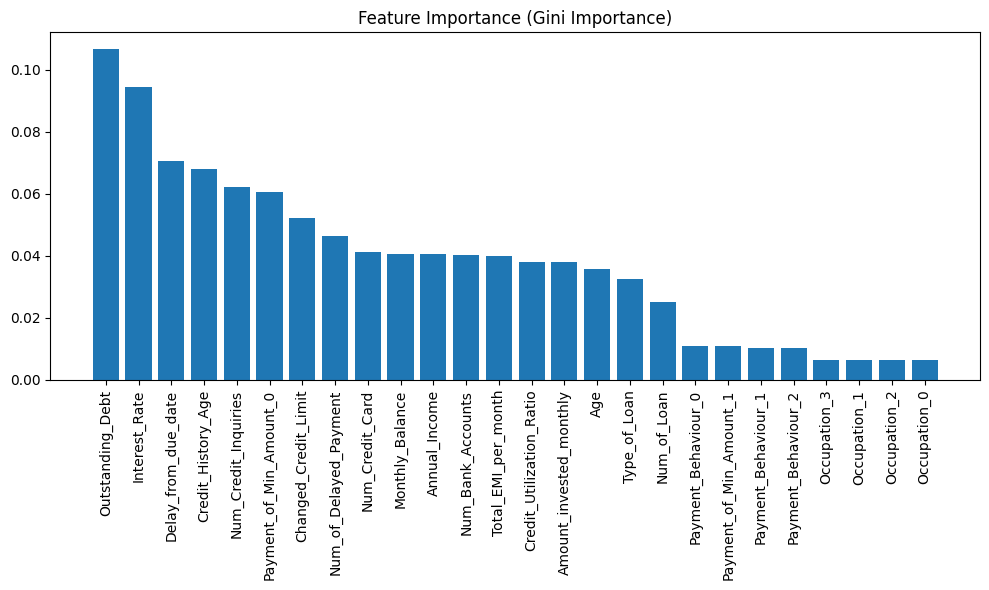

In [26]:
import matplotlib.pyplot as plt

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for i in range(X.shape[1]):
    print(f"{i + 1}. {feature_names[indices[i]]} ({feature_importances[indices[i]]:.4f})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Gini Importance)")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [24]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# List of classifiers to evaluate the model selection
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [26]:
# Empty dictionary to store results
results = {}

# Train each model and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    
   # Evaluate using accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    
    # Save results
    results[name] = {
        'Accuracy': accuracy, 
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    }

# Print the results for each model
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['Accuracy']:.4f}, F1 Score = {metrics['F1 Score']:.4f}, Precision = {metrics['Precision']:.4f}, Recall = {metrics['Recall']:.4f}")


c:\Users\lincy\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:37:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression: Accuracy = 0.6820, F1 Score = 0.6783, Precision = 0.6803, Recall = 0.6820
Decision Tree: Accuracy = 0.7375, F1 Score = 0.7369, Precision = 0.7365, Recall = 0.7375
Random Forest: Accuracy = 0.8426, F1 Score = 0.8407, Precision = 0.8421, Recall = 0.8426
Gradient Boosting: Accuracy = 0.7509, F1 Score = 0.7501, Precision = 0.7521, Recall = 0.7509
Support Vector Classifier: Accuracy = 0.7464, F1 Score = 0.7437, Precision = 0.7457, Recall = 0.7464
XGBoost: Accuracy = 0.8170, F1 Score = 0.8165, Precision = 0.8165, Recall = 0.8170
K-Nearest Neighbors: Accuracy = 0.7725, F1 Score = 0.7665, Precision = 0.7730, Recall = 0.7725


The Random Forest Classification shows maximum accuracy of 0.8426, thus predictive modelling can be done with the same algorithm

In [27]:
#Hyper parameter tuning and cross validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 100, num=10)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf = RandomForestClassifier()

# RandomizedSearchCV to find the best hyperparameters
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

# Find the best parameters
best_params = rf_random.best_params_
print(f"Best Parameters: {best_params}")

# Use cross-validation to evaluate the performance of the tuned model
rf_best = rf_random.best_estimator_
cv_scores = cross_val_score(rf_best, X_train_scaled, y_train, cv=5)

# Print cross-validation results
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\lincy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lincy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lincy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\lincy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.

Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}
Cross-validation Accuracy Scores: [0.84202985 0.8398806  0.84185075 0.84667741 0.84040838]
Mean CV Accuracy: 0.8422


In [28]:
from sklearn.metrics import confusion_matrix,classification_report
best_params = {
    'n_estimators': 400,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': 100,
    'bootstrap': False,
    'random_state': 42  # Set for reproducibility
}

# Initialize the Random Forest classifier with the best parameters
rf_model = RandomForestClassifier(**best_params)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Test Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Test Accuracy: 0.8505

Confusion Matrix:
[[14733   124  1094]
 [  614 13971  1369]
 [ 1864  2092 11996]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     15951
           1       0.86      0.88      0.87     15954
           2       0.83      0.75      0.79     15952

    accuracy                           0.85     47857
   macro avg       0.85      0.85      0.85     47857
weighted avg       0.85      0.85      0.85     47857



In [29]:

# Sample input
new_input = {
    'Age': 23.0,
    'Occupation': 'Scientist',
    'Annual_Income': 19114.12,
    'Num_Bank_Accounts': 3.0,
    'Num_Credit_Card': 4.0,
    'Interest_Rate': 3.0,
    'Num_of_Loan': 4.0,
    'Type_of_Loan': 'Other',
    'Delay_from_due_date': 3.0,
    'Num_of_Delayed_Payment': 7.0,
    'Changed_Credit_Limit': 11.27,
    'Num_Credit_Inquiries': 4.0,
    'Outstanding_Debt': 809.98,
    'Credit_Utilization_Ratio': 26.822619623699016,
    'Credit_History_Age': 265.0,
    'Payment_of_Min_Amount': 'No',
    'Total_EMI_per_month': 49.57494921489417,
    'Amount_invested_monthly': 21.465380264657146,
    'Payment_Behaviour': 'High_spent_Small_value_payments',
    'Monthly_Balance': 312.49408867943663
}

# Create a DataFrame from the new input data
new_input_df = pd.DataFrame([new_input])

# Step 1: Apply binary encoding for the relevant columns
new_input_encoded = binary_encoder.transform(new_input_df)

# Step 2: Apply target encoding to 'Type_of_Loan'
new_input_encoded['Type_of_Loan'] = target_encoder.transform(new_input_encoded[['Type_of_Loan']])

# Step 3: Apply log transformation to the selected numeric columns
new_input_encoded[selected_columns] = log_transformer.transform(new_input_encoded[selected_columns])

# Step 4: Scale the numeric features using the same scaler used for training
new_input_scaled = scaler.transform(new_input_encoded)

# Step 5: Make the prediction using the trained Random Forest model
predicted_class = rf_model.predict(new_input_scaled)

# Step 6: (Optional) Inverse transform the label if you want the original class names
predicted_class_label = label_encoder.inverse_transform(predicted_class)

# Output the prediction
print(f"Predicted class for the new input: {predicted_class_label[0]}")


ValueError: Unexpected input dimension 20, expected 21